## Results of Bootstraps

In [208]:
library(dplyr)
library(xtable)

In [209]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")

In [210]:
resamp_results <- read.csv("data/results/resamp_boot_results.csv")[, -1]
param_results <- read.csv("data/results/param_boot_results.csv")[, -1]
smooth_results <- read.csv("data/results/smooth_boot_results.csv")[, -1]
error_results <- read.csv("data/results/error_boot_results.csv")[, -1]

In [211]:
head(smooth_results)

,X.Intercept.,monthSpring,monthSummer,monthWinter,provBritish.Columbia,provManitoba,provNew.Brunswick,provNewfoundland.and.Labrador,provNorthwest.Territories,provNova.Scotia,provNunavut,provOntario,provPrince.Edward.Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.934920,-0.04245997,-0.5492539,-0.1948508,0.6515551,-0.5477383,-1.069497,-1.409036,-3.507887,-0.9351322,-3.123939,1.897935,-2.309540,0.7900198,-1.187602,-2.291547,-0.2482134
2,2.904923,-0.04074207,-0.5486760,-0.1950555,0.6414165,-0.4868302,-1.001618,-1.338108,-3.425839,-0.8722770,-3.047529,1.722456,-2.228886,0.7202894,-1.119536,-2.209971,-0.1740957
3,2.984455,-0.04330338,-0.5468556,-0.1995221,0.6539932,-0.6336642,-1.164881,-1.510846,-3.620002,-1.0225478,-3.243000,2.090196,-2.420394,0.8569532,-1.265613,-2.401578,-0.3350520
4,3.236990,-0.04804336,-0.5515612,-0.2117240,0.7190518,-1.1129440,-1.707100,-2.070458,-4.250612,-1.5556084,-3.906550,3.403850,-3.056143,1.3596106,-1.735982,-3.055202,-0.9019886
5,3.141159,-0.04155130,-0.5467633,-0.1992153,0.6917732,-0.9199258,-1.500135,-1.856794,-4.014165,-1.3387609,-3.623723,2.875049,-2.800774,1.1449072,-1.564485,-2.801871,-0.6788270
6,3.278271,-0.02782923,-0.5458436,-0.1909998,0.7553655,-1.1985879,-1.813752,-2.199607,-4.371203,-1.6375360,-4.005143,3.636605,-3.153486,1.4364154,-1.828587,-3.162151,-1.0044993


In [212]:
head(error_results)

,X.Intercept.,seasonSpring,seasonSummer,seasonWinter,provBritish.Columbia,provManitoba,provNew.Brunswick,provNewfoundland.and.Labrador,provNorthwest.Territories,provNova.Scotia,provNunavut,provOntario,provPrince.Edward.Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.699515,-0.04939341,-0.5644029,-0.2540712,0.7970201,-2.006120,-2.671376,-3.064948,-5.488898,-2.425398,-5.147376,5.643397,-4.281219,2.183941,-2.672495,-4.247180,-1.874105
2,3.625176,-0.05852822,-0.5528195,-0.2371354,0.8058068,-1.841590,-2.525398,-2.934343,-4.962600,-2.384595,-4.641117,5.360865,-4.108366,2.094093,-2.535229,-3.890552,-1.743621
3,3.709236,-0.07304630,-0.5725859,-0.2355005,0.8071427,-1.939634,-2.735903,-3.228107,-5.071177,-2.461993,-5.326972,5.700349,-4.100257,2.235775,-2.720226,-4.159272,-1.895234
4,3.616712,-0.05696503,-0.5356797,-0.2357946,0.8259597,-1.809953,-2.501839,-3.113147,-5.306339,-2.372605,-4.955931,5.448629,-4.077602,2.138923,-2.517175,-4.079266,-1.776259
5,3.627947,-0.06911946,-0.5413708,-0.2521120,0.8041241,-1.844577,-2.525781,-3.042427,-4.808079,-2.368481,-5.046660,5.428257,-3.982973,2.126333,-2.555986,-4.017323,-1.770421
6,3.652942,-0.05582750,-0.5327621,-0.2334410,0.8185922,-1.896705,-2.601671,-3.046191,-5.058875,-2.463401,-4.738303,5.541153,-4.052461,2.175224,-2.565476,-4.026424,-1.824742


In [213]:
newnames <- colnames(error_results)[2:4]
colnames(resamp_results)[2:4] <- newnames
colnames(param_results)[2:4] <- newnames
colnames(smooth_results)[2:4] <- newnames

## Confidence intervals

In [214]:
interval <- function(X, alpha=0.05) {
    quantiles <- quantile(X, probs = c(alpha/2, 1/2, 1-(alpha/2)))
    return(quantiles)
}

In [215]:
mean_and_sd <- function(X) {
    return(c(mean(X), sd(X)))
}

In [216]:
params <- rbind(resamp_results, param_results, smooth_results, error_results)
type <- factor(rep(c("R", "P", "S", "E"), each=10000))

results <- data.frame(type, params)
head(results)

,type,X.Intercept.,seasonSpring,seasonSummer,seasonWinter,provBritish.Columbia,provManitoba,provNew.Brunswick,provNewfoundland.and.Labrador,provNorthwest.Territories,provNova.Scotia,provNunavut,provOntario,provPrince.Edward.Island,provQuebec,provSaskatchewan,provYukon,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R,3.244585,0.006926766,-0.3788602,-0.1090520,0.9351093,-1.4236981,-2.010733,-2.692642,-4.857194,-2.057455,-4.393231,5.347779,-3.424353,2.204497,-2.086024,-3.830251,-1.6285986
2,R,3.260520,-0.138461074,-0.6429856,-0.2252399,0.6844205,-1.0172718,-1.743031,-2.039554,-3.623698,-1.370148,-3.518458,2.581892,-2.672919,1.082253,-1.578037,-2.582025,-0.6158624
3,R,4.766945,-0.147152623,-0.7518559,-0.2362456,1.0398042,-3.6080141,-4.505630,-5.352689,-8.452046,-4.269014,-7.468835,10.213959,-6.745724,4.006996,-4.381412,-6.603586,-3.9573799
4,R,3.709305,-0.118238225,-0.6555250,-0.3405262,0.7107021,-1.9523412,-2.606208,-2.614093,-5.208495,-2.246478,-5.088186,4.984171,-4.053228,1.886935,-2.532551,-4.084611,-1.6218533
5,R,3.552543,-0.197672329,-0.6612784,-0.1292685,0.9047185,-1.4811943,-2.291576,-2.839374,-5.344607,-2.297504,-4.459139,5.180023,-3.905299,2.041238,-2.388822,-4.085783,-1.6598213
6,R,3.012924,-0.121514940,-0.6325036,-0.1695788,0.8867711,-0.8422924,-1.191386,-1.660419,-3.773542,-1.144260,-3.015406,3.125995,-2.598399,1.275465,-1.307033,-2.677303,-0.7107480


In [217]:
month_indices <- grepl("month", colnames(results))
month_labels <- colnames(results)[month_indices]
month_labels <- sapply(month_labels, function(x) substr(x, 6, 8))

prov_indices <- grepl("prov", colnames(results))
prov_labels <- colnames(results)[prov_indices]
matches <- gregexpr("[A-Z]", prov_labels)
capital_letters <- regmatches(prov_labels, matches)
combined_letters <- sapply(capital_letters, function(x) paste(x, collapse = ""))

In [218]:
new_names <- colnames(results)[c(1, 2, 3:ncol(results))]

new_names[month_indices] <- month_labels
new_names[prov_indices] <- combined_letters
new_names[2] <- "intercept"

colnames(results) <- new_names

In [219]:
split_data <- split(results, type)

## Resampling Results

In [220]:
R_data <- split_data$R
head(R_data)

,type,intercept,seasonSpring,seasonSummer,seasonWinter,BC,M,NB,NL,NT,NS,N,O,PEI,Q,S,Y,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R,3.244585,0.006926766,-0.3788602,-0.1090520,0.9351093,-1.4236981,-2.010733,-2.692642,-4.857194,-2.057455,-4.393231,5.347779,-3.424353,2.204497,-2.086024,-3.830251,-1.6285986
2,R,3.260520,-0.138461074,-0.6429856,-0.2252399,0.6844205,-1.0172718,-1.743031,-2.039554,-3.623698,-1.370148,-3.518458,2.581892,-2.672919,1.082253,-1.578037,-2.582025,-0.6158624
3,R,4.766945,-0.147152623,-0.7518559,-0.2362456,1.0398042,-3.6080141,-4.505630,-5.352689,-8.452046,-4.269014,-7.468835,10.213959,-6.745724,4.006996,-4.381412,-6.603586,-3.9573799
4,R,3.709305,-0.118238225,-0.6555250,-0.3405262,0.7107021,-1.9523412,-2.606208,-2.614093,-5.208495,-2.246478,-5.088186,4.984171,-4.053228,1.886935,-2.532551,-4.084611,-1.6218533
5,R,3.552543,-0.197672329,-0.6612784,-0.1292685,0.9047185,-1.4811943,-2.291576,-2.839374,-5.344607,-2.297504,-4.459139,5.180023,-3.905299,2.041238,-2.388822,-4.085783,-1.6598213
6,R,3.012924,-0.121514940,-0.6325036,-0.1695788,0.8867711,-0.8422924,-1.191386,-1.660419,-3.773542,-1.144260,-3.015406,3.125995,-2.598399,1.275465,-1.307033,-2.677303,-0.7107480


In [221]:
alpha = 0.05

R_mean_and_sd <- apply(X=R_data[2:ncol(R_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
R_intervals <- apply(X=R_data[2:ncol(R_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

R_results <- rbind(R_mean_and_sd,
                   R_intervals)

rownames(R_results)[1:2] <- c("mean", "sd")

R_results <- t(R_results)

contains <- sapply(1:nrow(R_results), function(i) {
    (R_results[i, "2.5%"] <= 0) & (R_results[i, "97.5%"] >= 0)
})

R_results <- as.data.frame(R_results)
R_results$contains <- contains
R_results$sig <- !contains

R_results$col <- ifelse(R_results$contains == TRUE, 2, 1)


print(xtable(R_results[, -c(6,8)]), type = "latex", file = "resamp.tex")

In [222]:

# print(xtable(R_results[, 1:ncol(R_results)-1], type = "latex"), file = "filename2.tex")

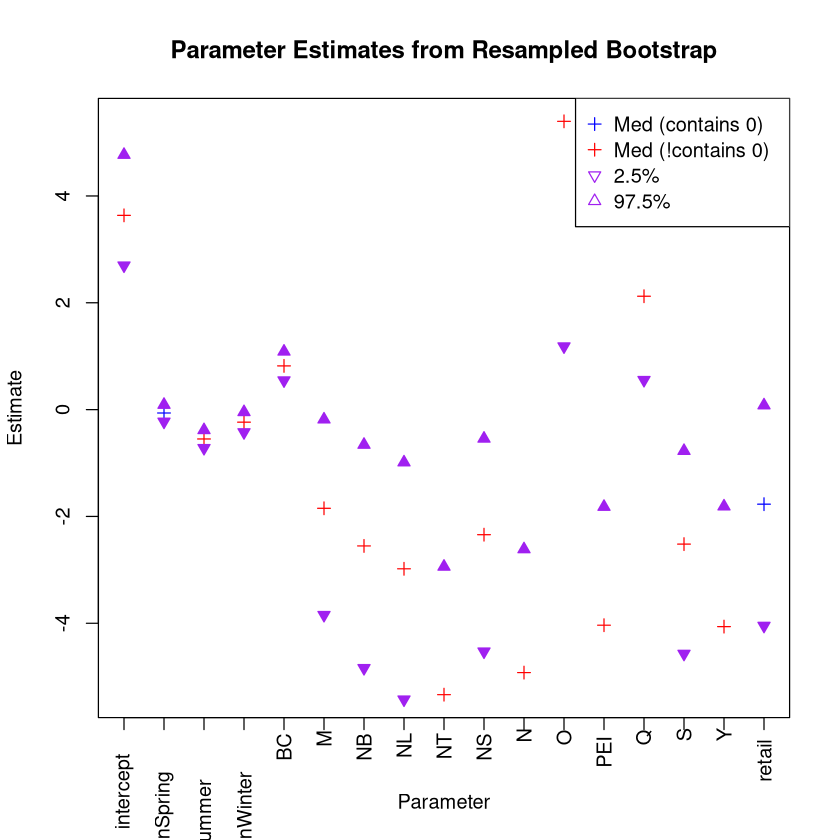

In [223]:
# Plot the median
palette(c("red", "blue"))
plot(R_results$`50%`, pch=3, type = "p", col = R_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Resampled Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(R_results), labels = FALSE)
text(1:nrow(R_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(R_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(R_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(R_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Parametric Bootstrap

In [224]:
P_data <- split_data$P
P_data

,type,intercept,seasonSpring,seasonSummer,seasonWinter,BC,M,NB,NL,NT,NS,N,O,PEI,Q,S,Y,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10001,P,3.963172,-0.025441331,-0.5394282,-0.20774660,0.9894374,-2.3770425,-3.1694738,-3.8691247,-5.811581,-3.2171276,-5.759695,6.80841318,-4.633526,2.55876312,-3.2519743,-4.886112,-2.3816607
10002,P,3.625495,-0.123532045,-0.6569072,-0.25612222,0.9308248,-1.8412242,-2.5448170,-2.8677713,-4.813196,-2.2057431,-5.002717,5.19795296,-3.682553,2.11693771,-2.3845558,-4.097368,-1.6864484
10003,P,3.231448,-0.083204960,-0.4454896,-0.18996214,0.5850643,-1.0456440,-1.5067522,-1.8791780,-4.369095,-1.6003843,-3.339285,2.77141002,-2.960267,1.02760287,-1.8451171,-3.240981,-0.6746832
10004,P,3.714770,0.051120142,-0.5743253,-0.22819306,1.0010481,-1.8812487,-2.6931498,-3.2693532,-5.779182,-2.4222609,-5.415889,6.22241701,-4.131865,2.55871549,-2.7367386,-4.159999,-2.1342180
10005,P,2.739805,-0.131038830,-0.5862504,-0.15223095,0.5540425,-0.1736415,-0.5632706,-0.8435661,-2.646468,-0.4315958,-2.580740,0.67056527,-1.927878,0.17273795,-0.9358264,-1.411433,0.2903777
10006,P,4.086451,0.007154692,-0.5574182,-0.35073579,0.9401045,-2.6449460,-3.4885470,-4.2069282,-6.972127,-3.1042196,-5.889044,8.08855385,-5.322222,3.03293560,-3.4070317,-5.378171,-2.9065918
10007,P,3.098026,-0.115015400,-0.5463144,-0.23493110,0.6256107,-0.9446242,-1.2499443,-1.8048703,-3.840425,-1.1809323,-3.484642,2.85251018,-2.359324,1.10631661,-1.4389115,-2.468811,-0.6443588
10008,P,4.465287,-0.160730742,-0.5351699,-0.28129346,1.1585054,-3.4625239,-4.2877986,-4.8856748,-7.959978,-4.1204517,-7.488409,10.23135525,-5.918757,4.09104361,-4.1361766,-6.292259,-3.8204000
10009,P,3.210447,-0.051048602,-0.5299081,-0.25652571,0.8444832,-1.1314215,-1.8254969,-2.1770043,-4.059834,-1.6554559,-3.700639,4.00656754,-3.278293,1.66602903,-1.8079666,-2.836824,-1.1332904


In [225]:
alpha = 0.05

P_mean_and_sd <- apply(X=P_data[2:ncol(P_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
P_intervals <- apply(X=P_data[2:ncol(P_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

P_results <- rbind(P_mean_and_sd,
                   P_intervals)

rownames(P_results)[1:2] <- c("mean", "sd")

P_results <- t(P_results)

contains <- sapply(1:nrow(P_results), function(i) {
    (P_results[i, "2.5%"] <= 0) & (P_results[i, "97.5%"] >= 0)
})

P_results <- as.data.frame(P_results)
P_results$contains <- contains
P_results$sig <- !contains

P_results$col <- ifelse(P_results$contains == TRUE, 2, 1)

P_results[, 1:ncol(P_results)-1]

,mean,sd,2.5%,50%,97.5%,contains,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
intercept,3.67940258,0.51126548,2.6773091,3.67511313,4.69077470,FALSE,TRUE
seasonSpring,-0.06532076,0.08374888,-0.2295456,-0.06519182,0.10043350,TRUE,FALSE
seasonSummer,-0.55194157,0.08688979,-0.7236796,-0.55074506,-0.38213582,FALSE,TRUE
seasonWinter,-0.22869157,0.08965910,-0.4065933,-0.22995397,-0.05078027,FALSE,TRUE
BC,0.81822871,0.16416765,0.5051385,0.81748162,1.14329057,FALSE,TRUE
M,-1.91769183,0.92325906,-3.7485942,-1.90911200,-0.11100067,FALSE,TRUE
NB,-2.63122463,1.04759939,-4.7203129,-2.62641109,-0.56624051,FALSE,TRUE
NL,-3.07894069,1.11194691,-5.3064835,-3.06323557,-0.88791718,FALSE,TRUE
NT,-5.40678126,1.27490062,-7.9180310,-5.39421497,-2.91237127,FALSE,TRUE


In [226]:
print(xtable(P_results[, -c(6,8)]), type = "latex", file = "param.tex")

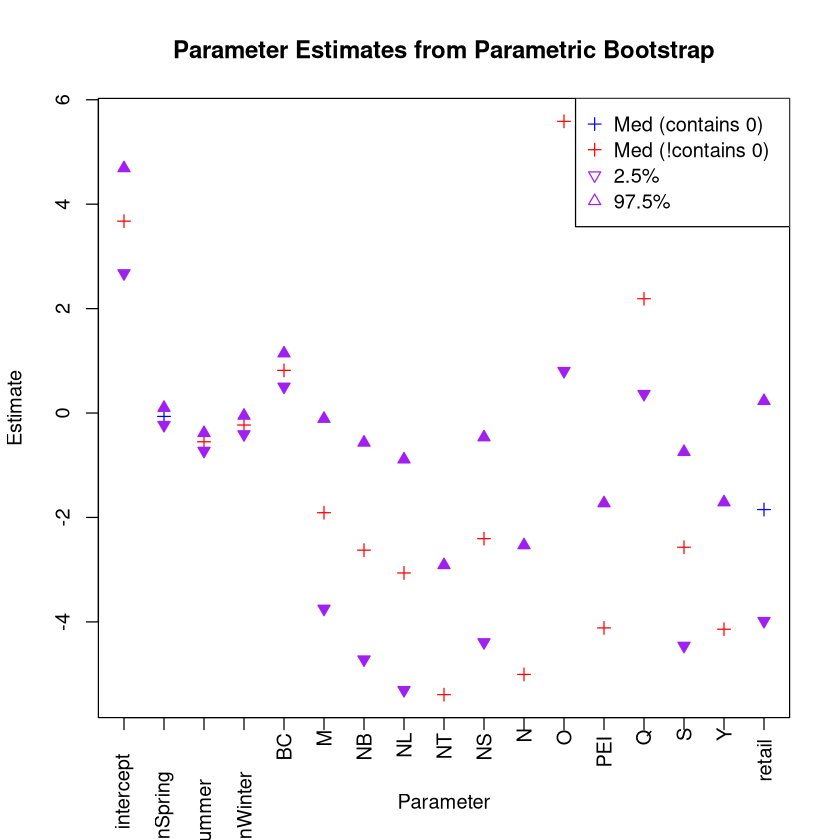

In [227]:
# Plot the median
palette(c("red", "blue"))
plot(P_results$`50%`, pch=3, type = "p", col = P_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Parametric Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(P_results), labels = FALSE)
text(1:nrow(P_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(P_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(P_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(P_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Smooth Bootstrap

In [228]:
S_data <- split_data$S

In [229]:
alpha = 0.05

S_mean_and_sd <- apply(X=S_data[2:ncol(S_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
S_intervals <- apply(X=S_data[2:ncol(S_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

S_results <- rbind(S_mean_and_sd,
                   S_intervals)

rownames(S_results)[1:2] <- c("mean", "sd")

S_results <- t(S_results)

contains <- sapply(1:nrow(S_results), function(i) {
    (S_results[i, "2.5%"] <= 0) & (S_results[i, "97.5%"] >= 0)
})

S_results <- as.data.frame(S_results)
S_results$contains <- contains
S_results$sig <- !contains


S_results$col <- ifelse(S_results$contains == TRUE, 2, 1)

S_results[, 1:ncol(S_results)-1]

,mean,sd,2.5%,50%,97.5%,contains,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
intercept,3.0032167,0.211839080,2.5785509,3.00613192,3.41745348,FALSE,TRUE
seasonSpring,-0.0432973,0.009423530,-0.0657243,-0.04139669,-0.02813229,FALSE,TRUE
seasonSummer,-0.5488623,0.006840469,-0.5649198,-0.54816059,-0.53537315,FALSE,TRUE
seasonWinter,-0.1984346,0.011935837,-0.2268721,-0.19627501,-0.17925248,FALSE,TRUE
BC,0.6665134,0.047726253,0.5721851,0.66546257,0.76338312,FALSE,TRUE
M,-0.6717034,0.387893635,-1.4323908,-0.67648953,0.10359043,TRUE,FALSE
NB,-1.2128494,0.440162662,-2.0806681,-1.21694261,-0.32875168,FALSE,TRUE
NL,-1.5647129,0.468847487,-2.4853613,-1.57066552,-0.62292596,FALSE,TRUE
NT,-3.6764259,0.524415788,-4.7039603,-3.68370460,-2.62777800,FALSE,TRUE


In [230]:
print(xtable(S_results[, -c(6,8)]), type = "latex", file = "smooth.tex")

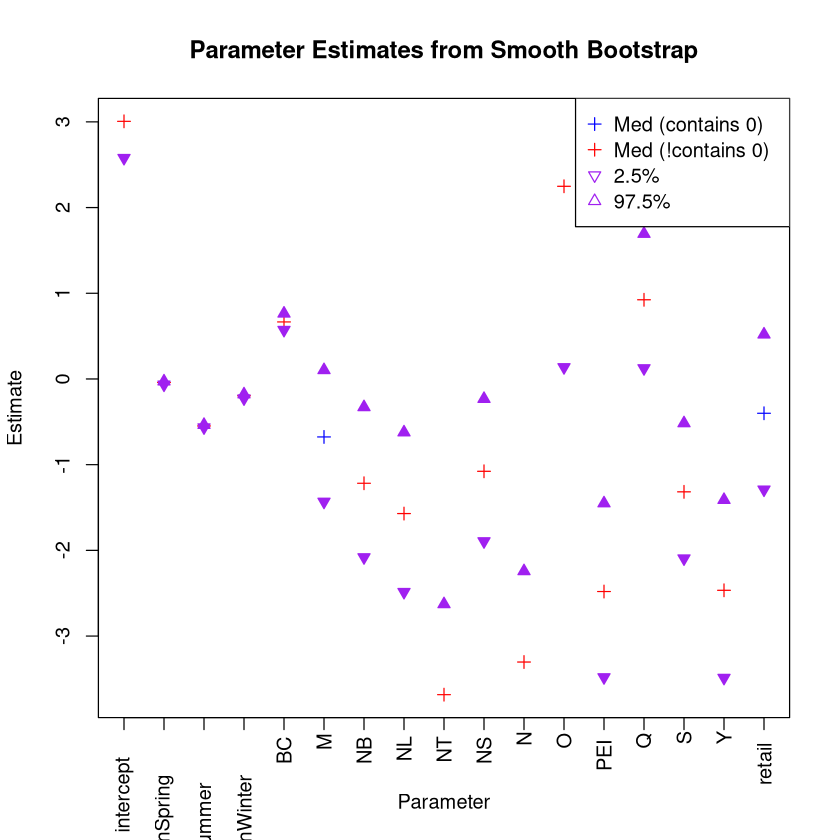

In [231]:
# Plot the median
palette(c("red", "blue"))
plot(S_results$`50%`, pch=3, type = "p", col = S_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Smooth Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(S_results), labels = FALSE)
text(1:nrow(S_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(S_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(S_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(S_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Error-Resampling Bootstrap

In [232]:
E_data <- split_data$E
head(E_data)

,type,intercept,seasonSpring,seasonSummer,seasonWinter,BC,M,NB,NL,NT,NS,N,O,PEI,Q,S,Y,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30001,E,3.699515,-0.04939341,-0.5644029,-0.2540712,0.7970201,-2.006120,-2.671376,-3.064948,-5.488898,-2.425398,-5.147376,5.643397,-4.281219,2.183941,-2.672495,-4.247180,-1.874105
30002,E,3.625176,-0.05852822,-0.5528195,-0.2371354,0.8058068,-1.841590,-2.525398,-2.934343,-4.962600,-2.384595,-4.641117,5.360865,-4.108366,2.094093,-2.535229,-3.890552,-1.743621
30003,E,3.709236,-0.07304630,-0.5725859,-0.2355005,0.8071427,-1.939634,-2.735903,-3.228107,-5.071177,-2.461993,-5.326972,5.700349,-4.100257,2.235775,-2.720226,-4.159272,-1.895234
30004,E,3.616712,-0.05696503,-0.5356797,-0.2357946,0.8259597,-1.809953,-2.501839,-3.113147,-5.306339,-2.372605,-4.955931,5.448629,-4.077602,2.138923,-2.517175,-4.079266,-1.776259
30005,E,3.627947,-0.06911946,-0.5413708,-0.2521120,0.8041241,-1.844577,-2.525781,-3.042427,-4.808079,-2.368481,-5.046660,5.428257,-3.982973,2.126333,-2.555986,-4.017323,-1.770421
30006,E,3.652942,-0.05582750,-0.5327621,-0.2334410,0.8185922,-1.896705,-2.601671,-3.046191,-5.058875,-2.463401,-4.738303,5.541153,-4.052461,2.175224,-2.565476,-4.026424,-1.824742


In [233]:
alpha = 0.05

E_mean_and_sd <- apply(X=E_data[2:ncol(E_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
E_intervals <- apply(X=E_data[2:ncol(E_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

E_results <- rbind(E_mean_and_sd,
                   E_intervals)

rownames(E_results)[1:2] <- c("mean", "sd")

E_results <- t(E_results)

contains <- sapply(1:nrow(E_results), function(i) {
    (E_results[i, "2.5%"] <= 0) & (E_results[i, "97.5%"] >= 0)
})

E_results <- as.data.frame(E_results)
E_results$contains <- contains
E_results$sig <- !contains

E_results$col <- ifelse(E_results$contains == TRUE, 2, 1)

E_results[, 1:ncol(E_results)-1]

,mean,sd,2.5%,50%,97.5%,contains,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
intercept,3.65907931,0.05232609,3.55597981,3.65889011,3.76098758,FALSE,TRUE
seasonSpring,-0.06686249,0.01206230,-0.09069678,-0.06694102,-0.04367337,FALSE,TRUE
seasonSummer,-0.56164712,0.01631474,-0.59371407,-0.56176815,-0.52947010,FALSE,TRUE
seasonWinter,-0.24188696,0.01411872,-0.26954937,-0.24184874,-0.21472836,FALSE,TRUE
BC,0.81978632,0.02120434,0.77836319,0.81988192,0.86149735,FALSE,TRUE
M,-1.89277538,0.09310281,-2.07349089,-1.89171302,-1.70922080,FALSE,TRUE
NB,-2.61137323,0.10887839,-2.82858549,-2.61084232,-2.39847612,FALSE,TRUE
NL,-3.06541203,0.12135411,-3.29789921,-3.06543911,-2.82500134,FALSE,TRUE
NT,-5.19838895,0.28099973,-5.79723068,-5.17886681,-4.70356729,FALSE,TRUE


In [234]:
print(xtable(E_results[, -c(6,8)]), type = "latex", file = "error.tex")

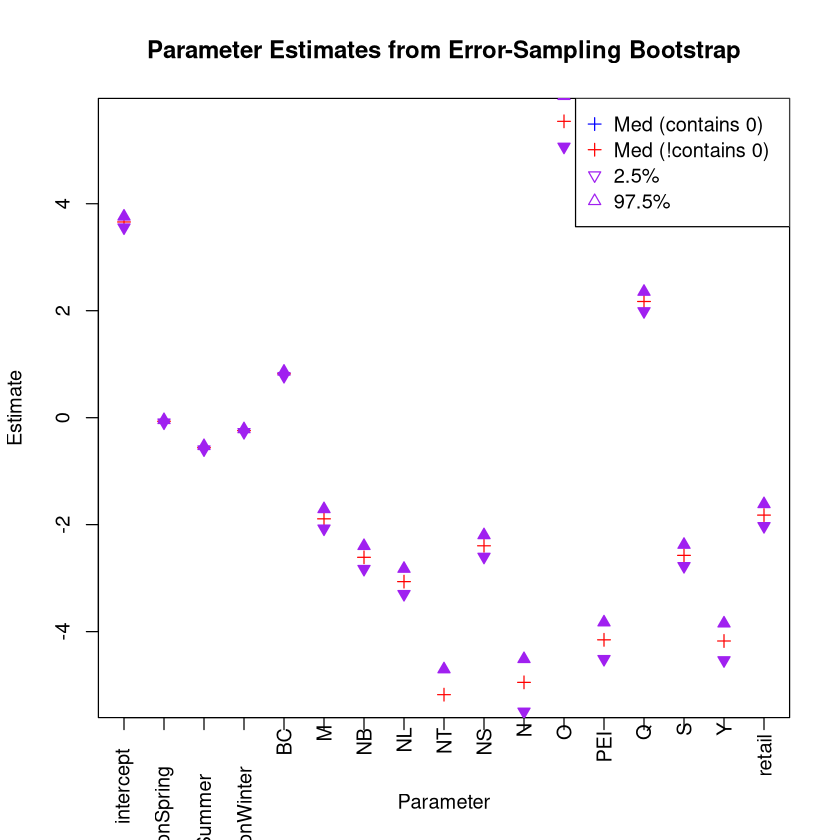

In [235]:
# Plot the median
palette(c("red", "blue"))
plot(E_results$`50%`, pch=3, type = "p", col = E_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Error-Sampling Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(E_results), labels = FALSE)
text(1:nrow(E_results), par("usr")[3], srt = 90, adj = 1.4, labels = rownames(E_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(E_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(E_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Concatenate Results

In [236]:
all_results <- rbind(R_results, P_results, S_results, E_results)
params <- rownames(R_results)

labels <- c(rep("R", nrow(R_results)), rep("P", nrow(P_results)), rep("S", nrow(S_results)), rep("E", nrow(E_results)))

all_results$type <- labels
all_results[, c("contains", "col")] <- NULL
all_results$param <- rep(params, 4)

rownames(all_results) <- NULL
head(all_results)

,mean,sd,2.5%,50%,97.5%,sig,type,param
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
1,3.66228302,0.52607625,2.6975978,3.63694632,4.77025453,TRUE,R,intercept
2,-0.06441936,0.08027795,-0.2257916,-0.06331621,0.09047168,FALSE,R,seasonSpring
3,-0.55129740,0.08485389,-0.7191962,-0.54987054,-0.38350957,TRUE,R,seasonSummer
4,-0.23505052,0.09606068,-0.4236374,-0.23491057,-0.04595924,TRUE,R,seasonWinter
5,0.81861051,0.13647920,0.5470062,0.81865706,1.08664175,TRUE,R,BC
6,-1.89181259,0.92979598,-3.8450863,-1.84755375,-0.18400619,TRUE,R,M
